# Bootcamp test
Happiness is a very important aspect of our society. As individuals, we try to pursue happiness all our lives. But in a broader view, a happy society also seems to correlate with a higher engagement with the Sustainable Development Goals. As you can read in the World Happiness Report 2020: “As countries become richer the well-being of their citizens stagnates unless further economic growth is more sustainable by, for example, addressing inequality and improving environmental quality.”

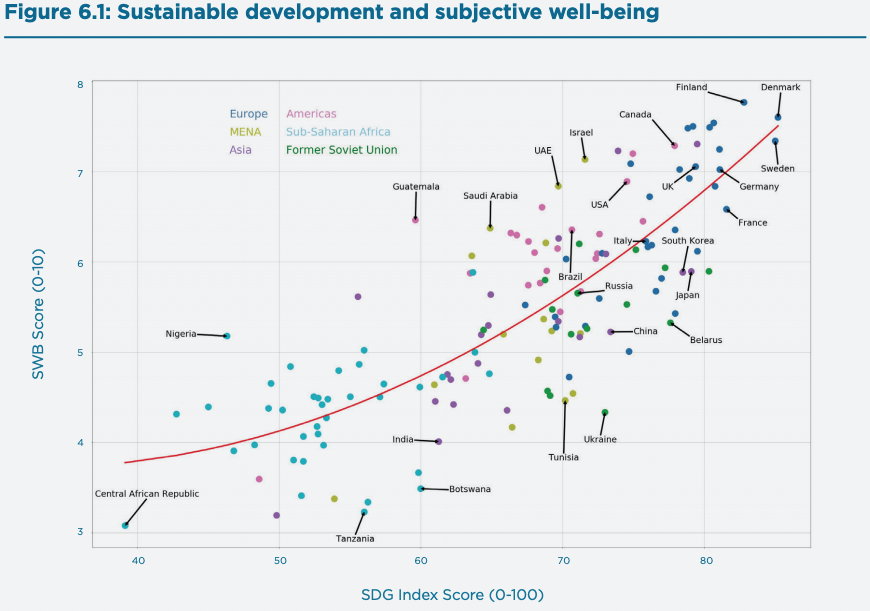

For this test, you will be using data from the World Happiness Report 2015 and 2019 from Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv 

**Tip:** If things get hard, don’t hesitate to ask google for help. Here is a little secret: Programming is basically 10% skill and 90% knowing how to google your way out of problems. But don’t tell anyone that. ;)

When finished send your notebook to education@fruitpunch.ai

Save your notebook as **BC_test_[first-name]_[last-name].ipynb**

Let’s dive into the data! 

#### 1. Load the 2 datasets 


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df_happiness_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_happiness_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

#### 2. Remove 'Dystopia residual' from 2015 dataset 

In [ ]:
del df_happiness_2015['Dystopia Residual']

#### 3. Add column ‘Year’ to both 2015 and 2019 dataset 

In [ ]:
df_happiness_2015['Year'] = 2015
df_happiness_2019['Year'] = 2019

#### 4. Create a new column Region and assign the regions from the 2015 dataset to the right countries in the 2019 dataset 

In [ ]:
# TODO: probably there's a more elegant pandas-only way to assign the 'Region' column into 2019 dataset
# TODO: some countries in 2019 table do not have 1:1 region match in 2015 dataset.
#       Some manual normalization might be necessary here
lut_region_by_country = df_happiness_2015.set_index('Country')['Region'].to_dict()
df_happiness_2019['Region'] = [
    lut_region_by_country.get(country)
    for country in df_happiness_2019['Country or region']
]

#### 5. Merge the 2 datasets to form a new one with the same number of columns as 2015 

In [ ]:
# TODO: most of the columns are easy to map between 2015 and 2019 datasets.
#       Two exceptions are:
#       - Family (2015) -> might be related to Social support (2019)
#       - Standard Error (2015) -> no idea.
_df_happiness_2019_temp = df_happiness_2019.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
})
_df_happiness_2019_temp['Family'] = None
_df_happiness_2019_temp['Standard Error'] = None

df_happiness_merge = pd.concat(
    [df_happiness_2015, _df_happiness_2019_temp],
    join='inner',
    ignore_index=True,
)

del _df_happiness_2019_temp
assert list(df_happiness_2015.columns) == list(df_happiness_merge.columns)

#### 6. List the countries that participated in 2015 but not 2019 

In [ ]:
countries_2015 = set(df_happiness_2015['Country'].to_list())
countries_2019 = set(df_happiness_2019['Country or region'].to_list())

for country in (countries_2015 - countries_2019):
    print(country)
    
del countries_2015
del countries_2019

#### 7. Plot a bar chart for the countries' generosity for each year

It should look something like this:

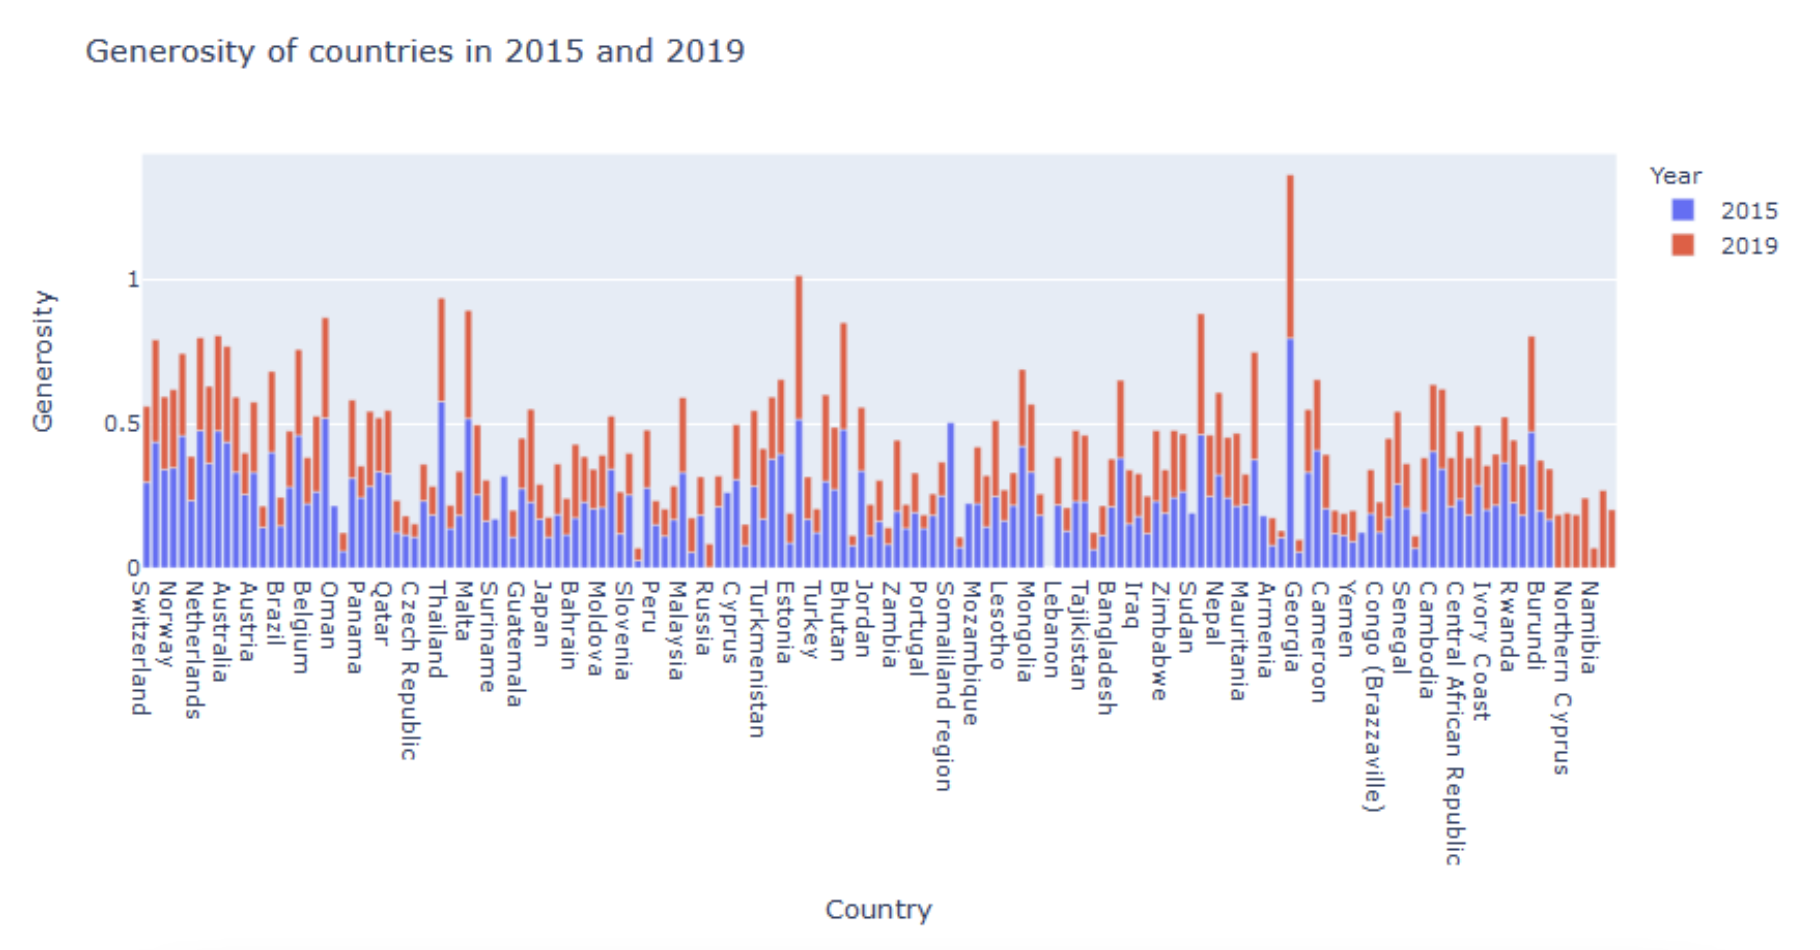

In [ ]:
plotdata = pd.DataFrame(index=set(df_happiness_merge['Country']))
plotdata[2015] = df_happiness_2015.set_index('Country')['Generosity']
plotdata[2019] = df_happiness_2019.set_index('Country or region')['Generosity']
plotdata.plot(kind="bar", stacked=True, figsize=(28,8))

plt.title("Generosity of countries in 2015 and 2019")
plt.xlabel("Country")
plt.ylabel("Generosity")

#### 8. Bubble chart of Freedom Vs Trust where the size of the bubble is the GDP per Capita for 2019 


In [ ]:
df_happiness_2019.plot.scatter(
    x="Freedom to make life choices",
    y="Perceptions of corruption",
    s=df_happiness_2019["GDP per capita"] * 500,
    figsize=(28, 8),
);
plt.title('Freedom Vs Trust where the size of the bubble is the GDP per Capita for 2019')


#### 9. Bubble chart of Family Vs Health where the size is the happiness score of 2015 

In [ ]:
df_happiness_2015.plot.scatter(
    x='Family',
    y='Health (Life Expectancy)',
    s=df_happiness_2015['Happiness Score'] * 50,
    figsize=(28, 8),
);
plt.title('Family Vs Health where the size is the happiness score of 2015')
# TODO: happiness rank might appear to be more interesting as 'size' of the bubble.

#### 10. List the 3 variables that have the strongest correlation with the Happiness score (use Pearson Correlation) 

In [ ]:
df_happiness_score_corr = df_happiness_merge.corr(method ='pearson')['Happiness Score'].drop('Happiness Score')
df_happiness_score_corr = df_happiness_score_corr.abs().sort_values(ascending=False)
df_happiness_score_corr[:3]